<h1 style="text-align: center;" markdown="1">TP2: Ensamble FINAL</h1>
![](../data/icon_properati-data.png)

Se entrenaran varios algoritmos y se iran combinando en este mismo notebook.

In [21]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

# modules
import knn as knnlibrary

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Obtener y limpiar dataset

In [22]:
properties =knnlibrary.get_dataset()
properties.head()

['properati-AR-2016-12-01-properties-sell.csv', 'properati-AR-2016-05-01-properties-sell.csv', 'properati-AR-2016-06-01-properties-sell.csv', 'properati-AR-2016-08-01-properties-sell.csv', 'properati-AR-2017-02-01-properties-sell.csv', 'properati-AR-2017-08-01-properties-sell-six_months.csv', 'properati-AR-2016-04-01-properties-sell.csv', 'properati-AR-2016-11-01-properties-sell.csv', 'properati-AR-2015-02-01-properties-sell-six_months.csv', 'properati-AR-2015-12-01-properties-sell-six_months.csv', 'properati-AR-2016-03-01-properties-sell-six_months.csv', 'properati-AR-2017-01-01-properties-sell.csv', 'properati-AR-2016-10-01-properties-sell.csv', 'properati-AR-2016-07-01-properties-sell.csv', 'properati-AR-2015-07-01-properties-sell-six_months.csv', 'properati-AR-2016-09-01-properties-sell.csv', 'properati-AR-2017-07-01-properties-sell-six_months.csv']


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ecc59daba3d5bc726ae8aa9dbccfe79635aef175,2016-06-01,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5888560251,-58.4087713338",...,130.0,NaN,3461.538462,5.0,4.0,NaN,http://www.properati.com.ar/ys05_venta_departa...,UNIDAD AL FRENTE CON BALCON CORRIDO Y 2 COCHER...,IMPECABLE PISO DE 4 AMB + DEP Y 2 COCHERAS,https://thumbs4.properati.com/2/RbSA4pJRsv2S8M...
1,7f1423f29df530cae38e7a59ddc6430c7da7ca38,2016-06-01,sell,apartment,Once,|Argentina|Capital Federal|Once|,Argentina,Capital Federal,3430291.0,"-34.6033997612,-58.3984088548",...,46.0,NaN,2065.217391,1.0,1.0,NaN,http://www.properati.com.ar/ys06_venta_departa...,SE VENDE A ESTRENAR EN PLENO CORAZON DE ONCE !...,Excelentes oficinas a estrenar!!!!!,https://thumbs4.properati.com/8/IMCZ4CqITeOqx5...
2,4fdd84d998a3f82f4a3b36f405cc3f7013fb642e,2016-06-01,sell,store,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.595849,-58.386979",...,0.0,NaN,NaN,NaN,NaN,500.0,http://www.properati.com.ar/ys0r_venta_local_b...,Local en Venta sobre Avenida Santa Fe.Ideal pa...,Local sobre Av. Santa Fe,https://thumbs4.properati.com/9/-VNE04tbyVFfcO...
3,a786b4d9a8f6cc86ba3e839f4cb85bbb03cf15fd,2016-06-01,sell,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.796679,-58.3993149",...,0.0,1285.714286,NaN,NaN,6.0,NaN,http://www.properati.com.ar/ys10_venta_casa_ad...,CHALET INMEJORABLE UBICACIÓN: PLANTA BAJA: AMP...,IMPORTANTE CHALET ZONA MUY RESIDENCIAL,https://thumbs4.properati.com/5/FhMeTqvYjAiHVS...
4,9844244d17eb024e0632a63b4098b67889de06bc,2016-06-01,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,NaN,...,120.0,1250.000000,1250.000000,NaN,4.0,NaN,http://www.properati.com.ar/ys1c_venta_casa_pi...,"Casa muy funcional, desarrollada en una sola p...",BAYUGAR PROPIEDADES/ LINDISIMA CASA/ BARRIO CA...,https://thumbs4.properati.com/2/dxU45Z8wqh3Mdq...


In [28]:
# filtro por CABA y GBA
properties_caba = properties[(properties['place_with_parent_names'].str.contains('Capital Federal') \
                             | properties['place_with_parent_names'].str.contains('Bs.As. G.B.A.'))]

properties_caba = properties_caba[properties_caba['price'].notnull() & properties_caba['price'] > 0 & properties_caba['place_name'].notnull()]

# eliminamos propiedades con mas de 54 pisos
properties_caba = properties_caba[properties_caba['floor'] <= 60]
# eliminamos propiedades con mas de 9 pisos - ver analisis
properties_caba = properties_caba[properties_caba['rooms'] <=  10]
# eliminamos propiedades con mas de 2000 m2 de superficie cubierta - ver analisis
properties_caba = properties_caba[(properties_caba['surface_covered_in_m2'] <= 4000) & (properties_caba['surface_covered_in_m2'] >= 0)]
# eliminamos propiedades con mas de 2000 m2 de superficie cubierta - ver analisis
properties_caba = properties_caba[(properties_caba['surface_total_in_m2']<= 6000)  & (properties_caba['surface_total_in_m2'] >= 0)]

properties_caba = knnlibrary.transform_date(properties_caba)
properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11526 entries, 385 to 80073
Data columns (total 30 columns):
id                            11526 non-null object
created_on                    11526 non-null object
operation                     11526 non-null object
property_type                 11526 non-null object
place_name                    11526 non-null object
place_with_parent_names       11526 non-null object
country_name                  11526 non-null object
state_name                    11526 non-null object
geonames_id                   10009 non-null float64
lat-lon                       10364 non-null object
lat                           10364 non-null float64
lon                           10364 non-null float64
price                         11526 non-null float64
currency                      11526 non-null object
price_aprox_local_currency    11526 non-null float64
price_aprox_usd               11526 non-null float64
surface_total_in_m2           11526 non-null float6

In [29]:
# filtro columnas segun lo que hay en el dataset
attributes = ['created_on_day','created_on_month','created_on_year','property_type','place_name','place_with_parent_names',\
              'country_name','state_name','lat','lon','surface_total_in_m2','surface_covered_in_m2',\
              'floor','rooms', 'price']
properties_caba[attributes].info()
properties_caba_with_price_attributes = properties_caba[attributes]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11526 entries, 385 to 80073
Data columns (total 15 columns):
created_on_day             11526 non-null int64
created_on_month           11526 non-null int64
created_on_year            11526 non-null int64
property_type              11526 non-null object
place_name                 11526 non-null object
place_with_parent_names    11526 non-null object
country_name               11526 non-null object
state_name                 11526 non-null object
lat                        10364 non-null float64
lon                        10364 non-null float64
surface_total_in_m2        11526 non-null float64
surface_covered_in_m2      11526 non-null float64
floor                      11526 non-null float64
rooms                      11526 non-null float64
price                      11526 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.4+ MB


In [31]:
from sklearn.preprocessing import LabelEncoder

properties_caba_with_price_attributes.fillna('NaN', inplace=True)
# atributos categoricos
encoder = LabelEncoder()

properties_caba_with_price_attributes['property_type'] = encoder.fit_transform(properties_caba_with_price_attributes[['property_type']])
#properties_caba_with_price_attributes['operation'] = encoder.fit_transform(properties_caba_with_price_attributes[['operation']])
properties_caba_with_price_attributes['place_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['place_name']])
properties_caba_with_price_attributes['place_with_parent_names'] = encoder.fit_transform(properties_caba_with_price_attributes[['place_with_parent_names']])
properties_caba_with_price_attributes['country_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['country_name']])
properties_caba_with_price_attributes['state_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['state_name']])

# completamos valores nan
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
properties_caba_with_price_attributes['floor'] = properties_caba_with_price_attributes[['floor']].fillna(1)
properties_caba_with_price_attributes['rooms'] = properties_caba_with_price_attributes[['rooms']].fillna(1)

properties_caba_with_price_attributes["lat"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["lat"]])
properties_caba_with_price_attributes["lon"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["lon"]])

properties_caba_with_price_attributes.head()

/opt/conda/lib/python3.5/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A

,created_on_day,created_on_month,created_on_year,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,price
385,2,6,2016,1,94,128,0,3,-34.544033,-58.472911,74.0,74.0,2.0,3.0,135000.0
890,9,6,2016,1,67,48,0,1,-34.648915,-58.796383,32.0,32.0,2.0,2.0,48000.0
1010,10,6,2016,1,23,99,0,3,-34.599574,-58.378334,43.0,43.0,10.0,3.0,129000.0
1018,10,6,2016,1,68,53,0,1,-34.651616,-58.623603,29.0,27.0,7.0,1.0,58000.0
1020,10,6,2016,1,90,42,0,1,-34.513637,-58.496707,30.0,30.0,2.0,2.0,55000.0


In [32]:
# separamos el train de traing para validarlo luego usando un 20% de los datos
from sklearn.model_selection import train_test_split
import datetime

now = datetime.datetime.now()

columns = properties_caba_with_price_attributes.iloc[:, properties_caba_with_price_attributes.columns != 'price'].columns
print(columns)

X, y = properties_caba_with_price_attributes.iloc[:, properties_caba_with_price_attributes.columns != 'price'].values, properties_caba_with_price_attributes.iloc[:, properties_caba_with_price_attributes.columns == 'price'].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=50)
    
len(X_test), len(X_train)

Index(['created_on_day', 'created_on_month', 'created_on_year',
       'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'lat', 'lon', 'surface_total_in_m2',
       'surface_covered_in_m2', 'floor', 'rooms'],
      dtype='object')


(2306, 9220)

In [33]:
# a cada dato le restamos la media y lo dividimos por su desviacion standard
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_std = stdsc.transform(X)

## Algoritmo 1: KNN

In [34]:
from sklearn.neighbors import KNeighborsRegressor
# busqueda de hiper-parametros
k_scores = []
k_list = []
p_list = []
labels = []

best_score = 0
best_k = 0
best_p = 0

for i in range(5,14):
    for p in range(2,100,4):
        knn = KNeighborsRegressor(n_neighbors=i, weights='distance', p=p)
        knn.fit(X_train_std, y_train)

        p_list.append(p)
        k_list.append(i)
        
        sc = knn.score(X_test_std, y_test)
        
        labels.append(str(round(sc,3)))
        k_scores.append(sc)
        
        if(sc > best_score):
            best_score = sc
            best_k = i
            best_p = p

mu = np.mean(k_scores)
v = np.var(k_scores)

k_scores = list(map(lambda x: ((x-mu)/v)*50, k_scores))

5 2


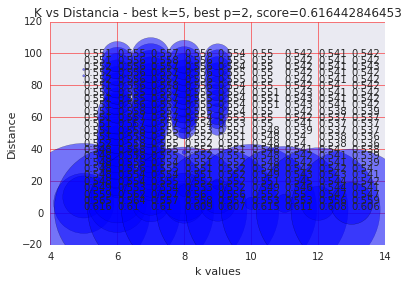

In [35]:
# graficamos
fig, ax = plt.subplots()
ax.scatter(k_list, p_list, s=k_scores, alpha=0.5)

title = "K vs Distancia - best k=%s, best p=%s, score=%s"%(best_k, best_p, best_score)
plt.title(title)
ylabel('Distance')
xlabel('k values')

for i, label in enumerate(labels):
    ax.annotate(label, (k_list[i],p_list[i]))

ax.grid(linestyle='-', linewidth='0.5', color='red')

#plt.savefig('/home/jovyan/work/TP/TP2/img/best_k=%s-best_p=%s-score=%s.png'%(best_k, best_p, best_score));

print(best_k, best_p)

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

model = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p)
model.fit(X_train_std, y_train)

print("RMSE: ", sqrt(mean_squared_error(model.predict(X_test_std),y_test)))

RMSE:  204008.07670284002


In [37]:
# entrenamos el modelo
model_knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p)
model_knn.fit(X_test_std, y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

## Algoritmo II: Random Forest

### RF con datos no-normalizados

In [ ]:
# crossvalidation: max_depth, min_samples_*
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

hyperparameters = { 'max_depth': [10,30,50,70,90,100],
                    'min_samples_leaf': [5,10,15],
                    'min_samples_split': [5,10,15]}

model = RandomForestRegressor(n_estimators=100, max_features='auto')
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: -33541212554.38330, std: 16248307702.43759, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5},
  mean: -33488184306.26409, std: 16301187654.12930, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
  mean: -35035329484.53563, std: 16401177089.94158, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 5},
  mean: -37422541072.42477, std: 16244407394.48372, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 10},
  mean: -37474200433.41467, std: 16588006068.28053, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10},
  mean: -37569916315.01438, std: 16410243779.76884, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 10},
  mean: -41397958145.92339, std: 16871433160.83206, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 15},
  mean: -41599834030.63509, std: 16619895273.71703, params: {'max_depth': 10, 'min_samples_split': 10, 'min_sa

In [ ]:
# crossvalidation: n_estimators
hyperparameters = { 'n_estimators': [100,200,300,400,500,600,700,800,900,1000]}

model = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=50, min_samples_leaf=5, min_samples_split=5)
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(clf.predict(X_test),y_test)))

In [ ]:
# entrenamos el modelo
model_rf1 = RandomForestRegressor(n_estimators=300, max_features='auto', max_depth=50, min_samples_leaf=5, min_samples_split=5)
model_rf1.fit(X, y)

### RF con datos normalizados

In [ ]:
# crossvalidation: max_depth, min_samples_*
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

hyperparameters = { 'max_depth': [10,30,50,70,90,100],
                    'min_samples_leaf': [5,10,15],
                    'min_samples_split': [5,10,15]}

model = RandomForestRegressor(n_estimators=100, max_features='auto')
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train_std, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

In [ ]:
# crossvalidation: n_estimators
hyperparameters = { 'n_estimators': [100,200,300,400,500,600,700,800,900,1000]}

model = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=100, min_samples_leaf=5, min_samples_split=5)
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train_std, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(clf.predict(X_test_std),y_test)))

In [ ]:
# entrenamos el modelo
model_rf2 = RandomForestRegressor(n_estimators=500, max_features='auto', max_depth=100, min_samples_leaf=5, min_samples_split=5)
model_rf2.fit(X_std, y)

## ENSAMBLE

### Levantar set de test

In [105]:
# leemos set de test
test_df = pd.read_csv('../data/test/properati_dataset_testing_noprice.csv', low_memory=False)
test_df.head()

# transformamos atributos categoricos
test_df['place_name'] = encoder.fit_transform(test_df[['place_name']])
test_df['state_name'] = encoder.fit_transform(test_df[['state_name']])
test_df['place_with_parent_names'] = encoder.fit_transform(test_df[['place_with_parent_names']])
test_df['property_type'] = encoder.fit_transform(test_df[['property_type']])

# tranformamos fechas
X_test_df = knnlibrary.transform_date(test_df)
X_test_df = X_test_df[['floor', 'lat', 'lon', 'place_name', 'place_with_parent_names',
       'property_type', 'rooms', 'state_name', 'surface_covered_in_m2',
       'surface_total_in_m2', 'created_on_year', 'created_on_month',
       'created_on_day']]

# completamos valores nan
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_test_df['floor'] = X_test_df[['floor']].fillna(1)
X_test_df['rooms'] = X_test_df[['rooms']].fillna(1)

X_test_df["surface_total_in_m2"] = imputer_mean.fit_transform(X_test_df[["surface_total_in_m2"]])
X_test_df["surface_covered_in_m2"] = imputer_mean.fit_transform(X_test_df[["surface_covered_in_m2"]])
X_test_df["lat"] = imputer_mean.fit_transform(X_test_df[["lat"]])
X_test_df["lon"] = imputer_mean.fit_transform(X_test_df[["lon"]])

X_test_std_df = stdsc.transform(X_test_df)

X_test_std_df.head()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


50.0       264
45.0       259
42.0       221
40.0       217
60.0       201
51.0       177
70.0       174
47.0       173
39.0       170
80.0       169
48.0       168
35.0       164
36.0       163
44.0       160
43.0       156
38.0       153
37.0       152
300.0      151
100.0      150
55.0       145
53.0       133
34.0       130
52.0       130
46.0       128
200.0      125
65.0       125
64.0       124
33.0       121
56.0       115
32.0       113
          ... 
362.0        1
625.0        1
522.0        1
614.0        1
527.0        1
369.0        1
533.0        1
535.0        1
536.0        1
538.0        1
544.0        1
545.0        1
549.0        1
551.0        1
552.0        1
553.0        1
560.0        1
342.0        1
564.0        1
565.0        1
570.0        1
572.0        1
575.0        1
576.0        1
590.0        1
591.0        1
592.0        1
610.0        1
613.0        1
16350.0      1
Name: surface_total_in_m2, dtype: int64


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

,floor,lat,lon,place_name,place_with_parent_names,property_type,rooms,state_name,surface_covered_in_m2,surface_total_in_m2,created_on_year,created_on_month,created_on_day
0,1.0,-34.610988,-58.363464,152,219,1,1.0,4,359.471588,0.0,2017,8,24
1,1.0,-34.629923,-58.465820,29,180,1,1.0,3,359.471588,0.0,2017,8,25
2,1.0,-34.589363,-58.412880,136,210,1,1.0,4,48.000000,53.0,2017,8,1
3,1.0,-34.629923,-58.465820,40,193,1,1.0,4,39.000000,39.0,2017,8,1
4,1.0,-34.629923,-58.465820,40,193,1,1.0,4,51.000000,51.0,2017,8,1


### Predecir y ensamblar

In [64]:
y_knn = model_knn.predict(X_test_std_df)
y_rf1 = model_rf1.predict(X_test_df)
y_rf2 = model_rf2.predict(X_test_std_df)

In [82]:
print(y_knn[y_knn< 130045.4243309] )

[ 124272.02690282  124247.50158143  120892.02594912 ...,  128874.72549885
  120862.16107823  129237.5274164 ]


Tener en cuenta para el ensamble cuales fueron los RMSE de cada algoritmo asi le damos un peso acorde a los errores de cada modelo

In [62]:
# ensamble
C1 = 0.2
C2 = 0.4
C3 = 0.4

y_final = []
for row1,row2,row3 in zip(y_knn,y_rf1,y_rf2):
    y_final.append(C1 * float(row1) + C2 * float(row2) + C3 * float(row3))

In [63]:
# escribir al archivo
output = pd.DataFrame( data={"id":test_df["id"], "price_usd":y_final} )
output.to_csv( "../data/result/ensamblev02_"+str(now)+".csv", index=False, quoting=3 )